In [1]:
#import the libraries
import tensorflow
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
#Load the dataset
fashion_mnist=datasets.fashion_mnist



**Data Exploration:**


In [3]:
#get the train and the test sets
(train_images, train_labels), (test_images, test_labels)=fashion_mnist.load_data()

In [4]:
print(type(train_images), type(train_labels))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [5]:
print(type(test_images), type(test_labels))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [6]:
print("No. of Images in the training set:", len(train_images))
print("No. of Images in the test set:", len(test_images))

No. of Images in the training set: 60000
No. of Images in the test set: 10000


In [7]:
#shape of the image
print(train_images[0].shape)

(28, 28)


In [8]:
#first image
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

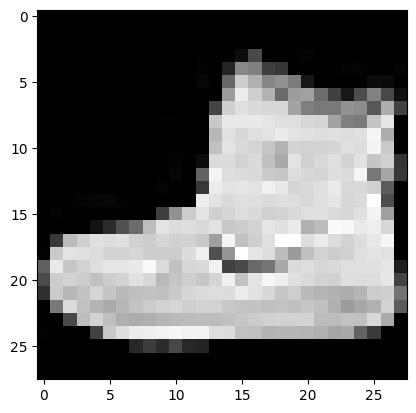

In [9]:
#Display first  image in the training set
plt.imshow(train_images[0], cmap='gray')
plt.show()

In [10]:
#Label of the first image
print(train_labels[0])

9


9 indicates ankle boot.

For reference:
* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot





**Data Preprocessing:**

In [11]:
#Normalize the pixel values between 0 and 1
train_images= train_images/255.0
test_images=test_images/255.0

In [12]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [13]:
#reshape the train and test images
# In (28, 28, 1), 1 indicates single channel i.e. Grayscale images

train_images=train_images.reshape((len(train_images), 28, 28, 1))
test_images= test_images.reshape((len(test_images), 28, 28, 1))

In [14]:
train_images.shape

(60000, 28, 28, 1)

**Build the CNN model:**

In [15]:
#Convolutional Base
model=models.Sequential()
model.add( layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add( layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

#Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) #10 neurons correspond to the 10 classes present.


In [16]:
#compile the model
import tensorflow as tf
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


**Model Training:**

In [17]:
from sklearn.model_selection import train_test_split
#Split the training set into training and validation set
train_images, val_images, train_labels, val_labels= train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

#Train the model using testing and validation sets
history=model.fit(train_images, train_labels, epochs=5, validation_data=(val_images, val_labels))


Epoch 1/5
1500/1500 [==============================] - 59s 38ms/step - loss: 0.5185 - accuracy: 0.8129 - val_loss: 0.3581 - val_accuracy: 0.8685
Epoch 2/5
1500/1500 [==============================] - 47s 31ms/step - loss: 0.3311 - accuracy: 0.8784 - val_loss: 0.3205 - val_accuracy: 0.8805
Epoch 3/5
1500/1500 [==============================] - 47s 32ms/step - loss: 0.2843 - accuracy: 0.8954 - val_loss: 0.3000 - val_accuracy: 0.8892
Epoch 4/5
1500/1500 [==============================] - 47s 31ms/step - loss: 0.2558 - accuracy: 0.9061 - val_loss: 0.2729 - val_accuracy: 0.8982
Epoch 5/5
1500/1500 [==============================] - 49s 33ms/step - loss: 0.2300 - accuracy: 0.9133 - val_loss: 0.2772 - val_accuracy: 0.8978


**Model Evaluation:**

In [18]:
#Evaluate the model
test_loss, test_acc=model.evaluate(test_images, test_labels, verbose=2)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


313/313 - 3s - loss: 0.2905 - accuracy: 0.8971 - 3s/epoch - 8ms/step
Test Loss: 0.29053133726119995
Test Accuracy: 0.8970999717712402


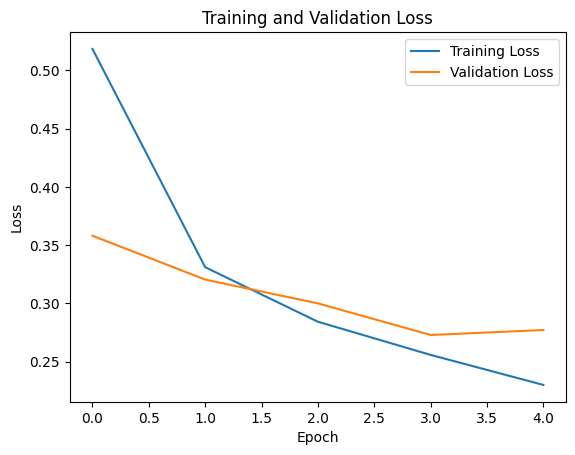

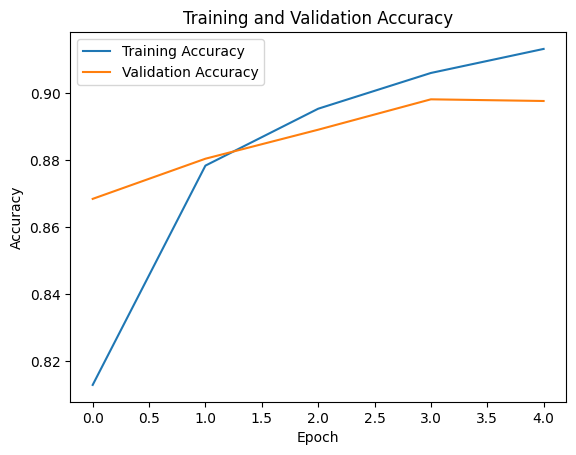

In [19]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 [==============================] - 3s 8ms/step


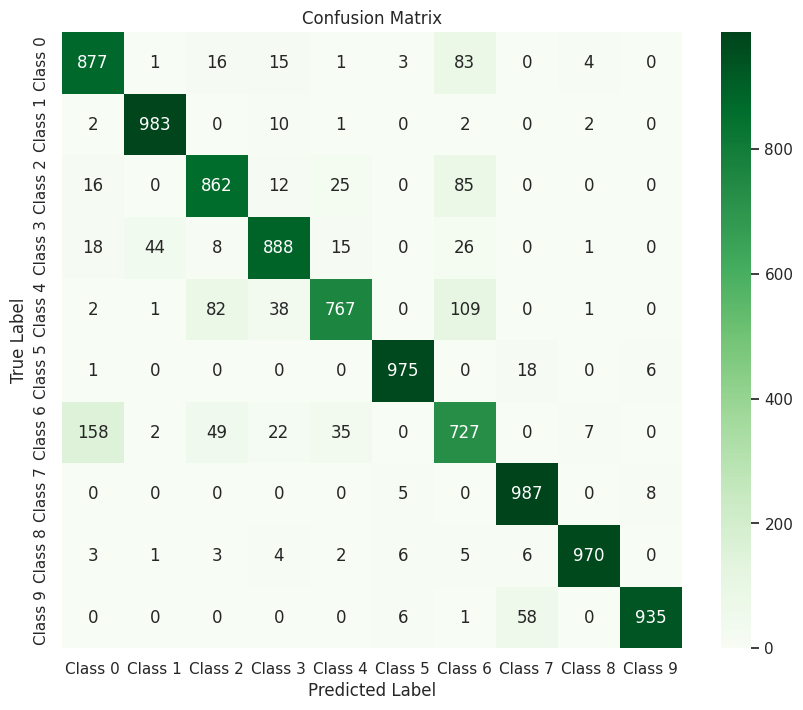

              precision    recall  f1-score   support

     Class 0       0.81      0.88      0.84      1000
     Class 1       0.95      0.98      0.97      1000
     Class 2       0.85      0.86      0.85      1000
     Class 3       0.90      0.89      0.89      1000
     Class 4       0.91      0.77      0.83      1000
     Class 5       0.98      0.97      0.98      1000
     Class 6       0.70      0.73      0.71      1000
     Class 7       0.92      0.99      0.95      1000
     Class 8       0.98      0.97      0.98      1000
     Class 9       0.99      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns. set()
# Get predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Generate confusion matrix
conf_mat = confusion_matrix(test_labels, predicted_labels)

# Display the confusion matrix using a heatmap
class_names = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6", "Class 7", "Class 8", "Class 9"]

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Greens", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
report = classification_report(test_labels, predicted_labels, target_names=class_names)
print(report)




**Save the model:**

In [21]:
model.save('Fashion_mnist_trained_model_using_CNN.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
